In [1]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [2]:
automobile_df = pd.read_csv('../datasets/automobiles/auto-mpg.csv')

automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
automobile_df.shape

(398, 9)

In [4]:
automobile_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [13]:
automobile_df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
362,24.2,6,146.0,120,2930,13.8,81,3,datsun 810 maxima
270,21.1,4,134.0,95,2515,14.8,78,3,toyota celica gt liftback
145,32.0,4,83.0,61,2003,19.0,74,3,datsun 710
269,30.9,4,105.0,75,2230,14.5,78,1,dodge omni
130,26.0,4,122.0,80,2451,16.5,74,1,ford pinto
357,32.9,4,119.0,100,2615,14.8,81,3,datsun 200sx
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
371,29.0,4,135.0,84,2525,16.0,82,1,dodge aries se
289,16.9,8,350.0,155,4360,14.9,79,1,buick estate wagon (sw)
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [14]:
automobile_df = automobile_df.replace('?', np.nan)

In [15]:
automobile_df = automobile_df.dropna()

In [17]:
automobile_df.shape

(392, 9)

In [18]:
automobile_df.drop(['origin', 'car name'], axis=1, inplace=True)

In [19]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
182,28.0,4,107.0,86,2464,15.5,76
157,15.0,8,350.0,145,4440,14.0,75
26,10.0,8,307.0,200,4376,15.0,70
153,18.0,6,250.0,105,3459,16.0,75
306,28.8,6,173.0,115,2595,11.3,79


In [20]:
automobile_df['model year'] = '19' + automobile_df['model year'].astype(str)

automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,1970
1,15.0,8,350.0,165,3693,11.5,1970
2,18.0,8,318.0,150,3436,11.0,1970
3,16.0,8,304.0,150,3433,12.0,1970
4,17.0,8,302.0,140,3449,10.5,1970


In [21]:
automobile_df['age'] = datetime.datetime.now().year - pd.to_numeric\
            (automobile_df['model year'])

In [22]:
automobile_df.drop(['model year'], axis=1, inplace=True)

automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
150,26.0,4,108.0,93,2391,15.5,46
321,32.2,4,108.0,75,2265,15.2,40
78,21.0,4,120.0,87,2979,19.5,48
177,23.0,4,115.0,95,2694,15.0,45
160,17.0,6,231.0,110,3907,21.0,45


In [24]:
automobile_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [25]:
automobile_df['horsepower'] = pd.to_numeric(automobile_df['horsepower'], errors='coerce')

In [26]:
automobile_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,44.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,38.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,41.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,44.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,47.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,50.000000


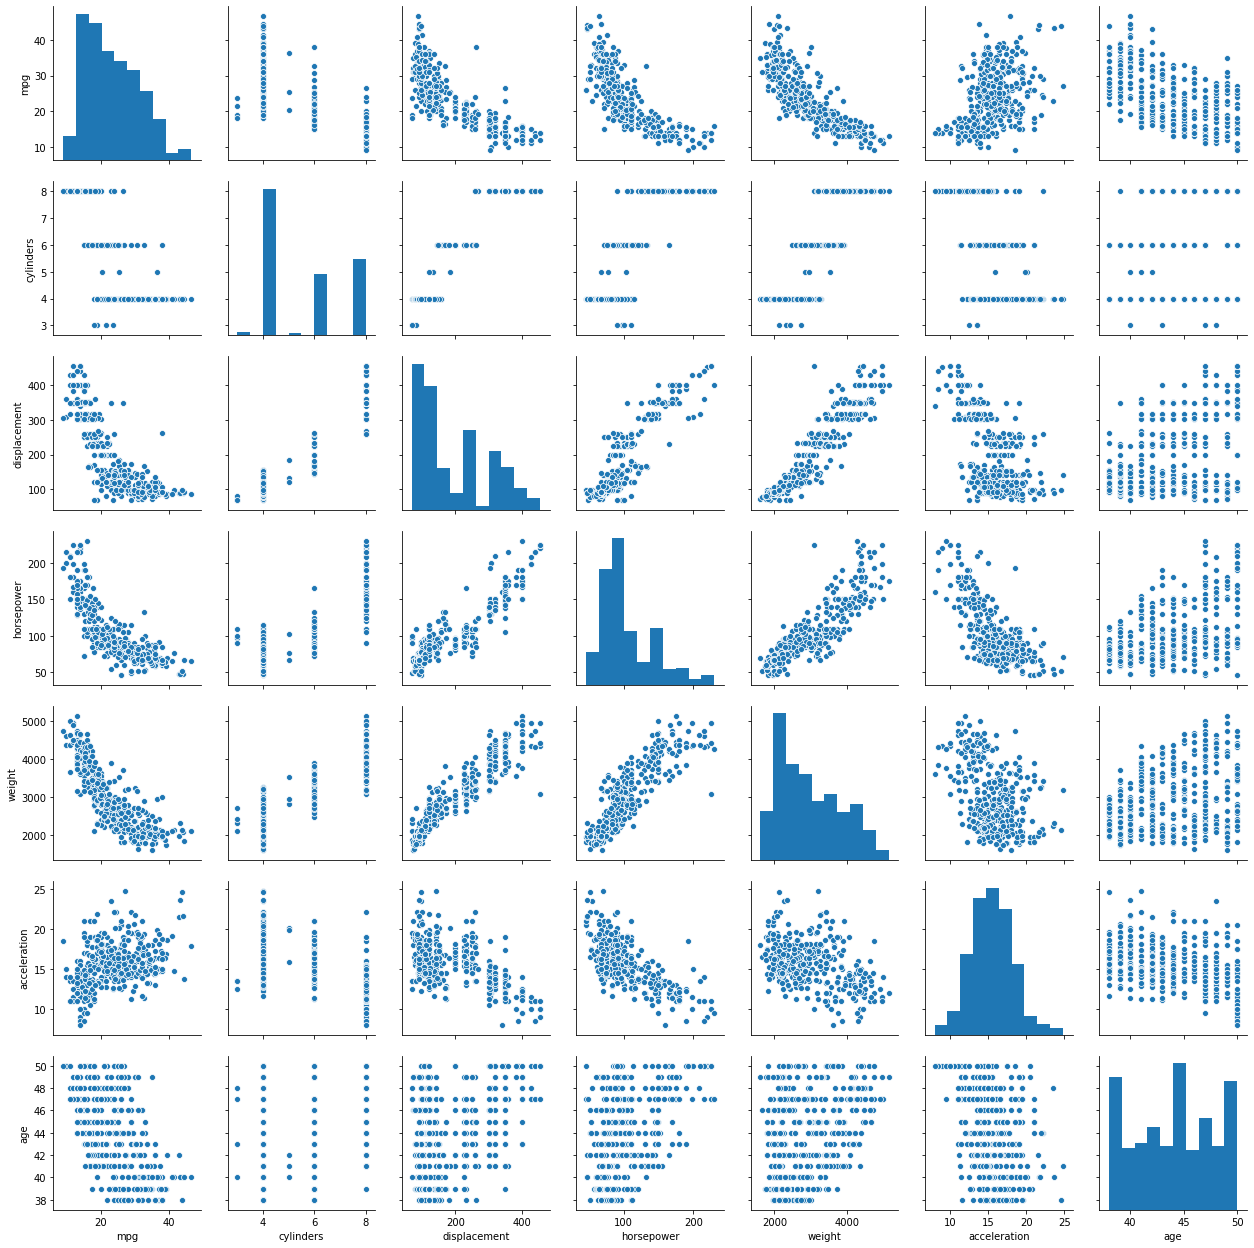

In [29]:
sns.pairplot(automobile_df)

Text(0, 0.5, 'Miles per gallon')

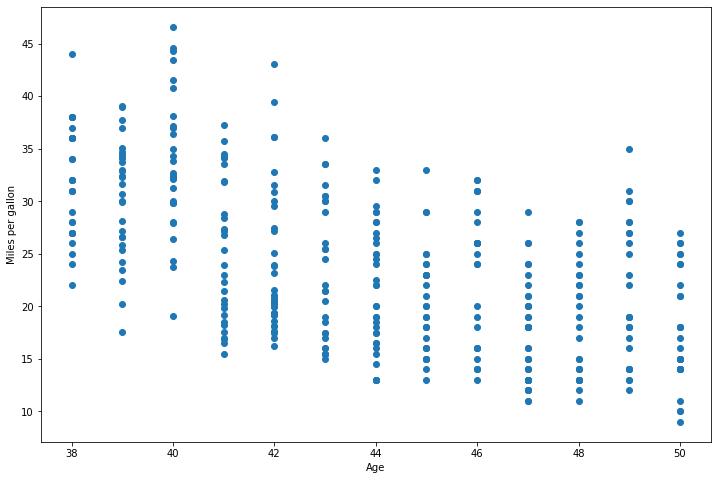

In [30]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['age'], automobile_df['mpg'])

plt.xlabel('Age')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

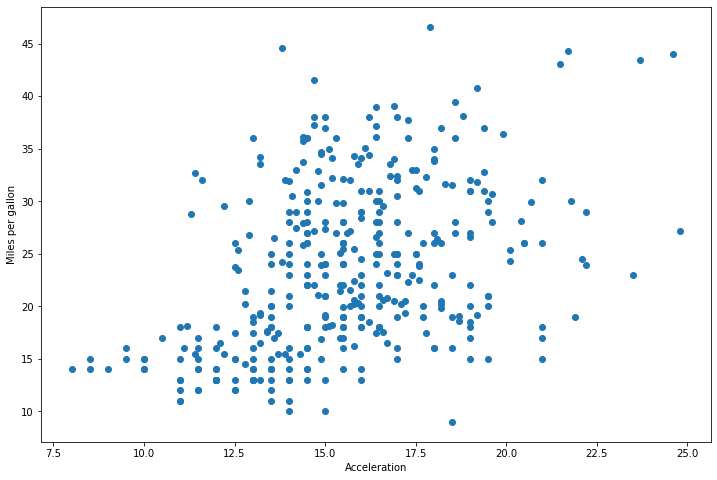

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['acceleration'], automobile_df['mpg'])

plt.xlabel('Acceleration')
plt.ylabel('Miles per gallon')

In [32]:
automobile_df = automobile_df.sample(frac=1).reset_index(drop=True)

automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,30.0,4,79.0,70,2074,19.5,49
1,30.0,4,97.0,67,1985,16.4,43
2,15.0,6,258.0,110,3730,19.0,45
3,21.1,4,134.0,95,2515,14.8,42
4,34.7,4,105.0,63,2215,14.9,39


In [33]:
automobile_df.to_csv('../datasets/automobiles/auto-mpg-processed.csv', index=False)